# EXPLORATORY DATA ANALYSIS ON ENERGY PROFILE OF INDIA 1985-2019

#### This notebook is intended to understand & learn the basic EDA Analysis using Python, Here Energy consumption and Electricity production in India is analysed.

# Library Imports

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Data Reading

Dataset is downloaded from https://www.kaggle.com/datasets/shubamsumbria/complete-energy-profile-of-india-1965-2019

In [2]:
import os
os.chdir(r'C:\Users\RAJAT SINGH\Downloads\India energy consumption')

In [4]:
df=pd.read_csv('EnergyScenario.csv')

# Data Cleaning and Preprocessing

In [5]:
df.head()

,Unnamed: 0,Year,Entity,Code,Oil Consumption - EJ,Gas Consumption - EJ,Coal Consumption - EJ,Solar Consumption - EJ,Hydro Consumption - EJ,Nuclear Consumption - EJ,...,Solar (% electricity),Wind (% electricity),Oil (% electricity),Nuclear (% electricity),Other renewables (% electricity),Fossil fuels (% electricity),Low-carbon electricity (% electricity),Nuclear (% electricity).1,Renewables (% electricity),Access to electricity (% of population)
0,0,1965,India,IND,146.995250,2.372522,413.407682,0.0,53.241536,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1966,India,IND,164.149813,2.663272,412.415691,0.0,55.598552,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1967,India,IND,169.360364,3.558783,419.285587,0.0,62.215381,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1968,India,IND,189.771047,3.954203,433.825064,0.0,71.803031,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1969,India,IND,227.929016,4.745044,460.841576,0.0,79.721129,2.013284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df['Year'].unique()

array([1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

In [7]:
df.isnull().sum()

Unnamed: 0                                                                0
Year                                                                      0
Entity                                                                    0
Code                                                                      0
Oil Consumption - EJ                                                      0
Gas Consumption - EJ                                                      0
Coal Consumption - EJ                                                     0
Solar Consumption - EJ                                                    0
Hydro Consumption - EJ                                                    0
Nuclear Consumption - EJ                                                  0
Wind Consumption - EJ                                                     0
Geo Biomass Other - EJ                                                    0
Biofuels (TWh)                                                            0
Access to cl

In [8]:
df.shape

(55, 45)

In [9]:
# Dropping columns 
df.drop(columns=['Access to clean fuels and technologies for cooking  (% of population)', 'Unnamed: 0','Entity','Code'], axis=1, inplace=True)

### Creating a new column 

In [10]:
consumption_columns = ['Oil Consumption - EJ', 'Gas Consumption - EJ', 'Coal Consumption - EJ',
                       'Solar Consumption - EJ', 'Hydro Consumption - EJ',
                       'Nuclear Consumption - EJ', 'Wind Consumption - EJ',
                       'Geo Biomass Other - EJ', 'Biofuels (TWh)']

df['Total Consumption'] = df[consumption_columns].sum(axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 42 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Year                                                         55 non-null     int64  
 1   Oil Consumption - EJ                                         55 non-null     float64
 2   Gas Consumption - EJ                                         55 non-null     float64
 3   Coal Consumption - EJ                                        55 non-null     float64
 4   Solar Consumption - EJ                                       55 non-null     float64
 5   Hydro Consumption - EJ                                       55 non-null     float64
 6   Nuclear Consumption - EJ                                     55 non-null     float64
 7   Wind Consumption - EJ                                        55 non-null     float

In [12]:
# changeing the column order of Total Consumption
column_name = 'Total Consumption'
other_columns = [col for col in df.columns if col != column_name]
new_columns = other_columns[:9] + [column_name] + other_columns[9:]
df = df.reindex(columns=new_columns)

### Setting Year as index

In [13]:
# Setting Year column as index
df.set_index('Year', inplace=True)

### Dropping some of the rows

In [14]:
# Removing the first few rows 
df.drop([1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984], inplace=True)

### Replacing nan values to 0

In [15]:
# Removing the nan values with 0
df=df.replace(np.nan, 0)

In [17]:
# Resetting the index 
df=df.reset_index()

In [18]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
for col in df.columns:
    print(col)

year
oil_consumption_-_ej
gas_consumption_-_ej
coal_consumption_-_ej
solar_consumption_-_ej
hydro_consumption_-_ej
nuclear_consumption_-_ej
wind_consumption_-_ej
geo_biomass_other_-_ej
total_consumption
biofuels_(twh)
annual_change_primary_energy_consumption_(%)
annual_co2_emissions_per_unit_energy_(kg_per_kilowatt-hour)
electricity_generation_(twh)
electricity_from_coal_(twh)
electricity_from_gas_(twh)
electricity_from_hydro_(twh)
electricity_from_other_renewables_(twh)
electricity_from_solar_(twh)
electricity_from_oil_(twh)
electricity_from_wind_(twh)
electricity_from_nuclear_(twh)
energy_consumption_per_gdp_(kwh_per_$)
fossil_fuels_(%_sub_energy)
low-carbon_energy_(%_sub_energy)
nuclear_(%_sub_energy)
per_capita_electricity_(kwh)
energy_consumption_per_capita_(kwh)
primary_energy_consumption_(twh)
coal_(%_electricity)
gas_(%_electricity)
hydro_(%_electricity)
solar_(%_electricity)
wind_(%_electricity)
oil_(%_electricity)
nuclear_(%_electricity)
other_renewables_(%_electricity)
fossi

# ENERGY CONSUMPTION IN INDIA

## Analysing total energy consumption from 1985 to 2019

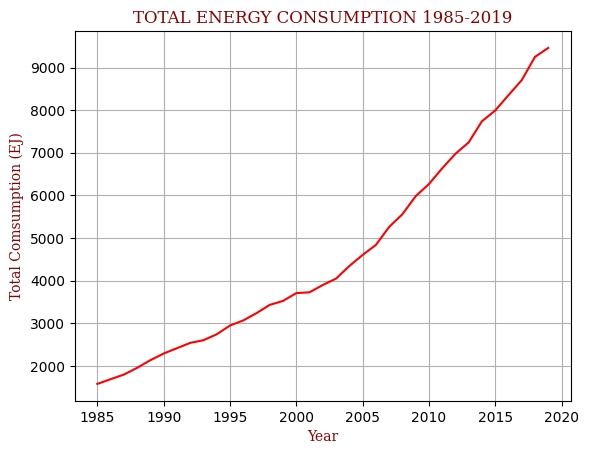

In [19]:
font1 = {'family':'serif','color':'darkred','size':12}
font2 = {'family':'serif','color':'darkred','size':10}

plt.title("TOTAL ENERGY CONSUMPTION 1985-2019", fontdict = font1)
plt.xlabel("Year",fontdict = font2)
plt.ylabel("Total Comsumption (EJ)",fontdict = font2)

plt.plot(df['year'],df['total_consumption'],'-r')

plt.grid()
plt.show()

Conclusion: It has beed observed that energy consumption in India have increased by nearly four times in three dacades.

## Analysing diffrent mode of energy consumption from 1985 to 2019

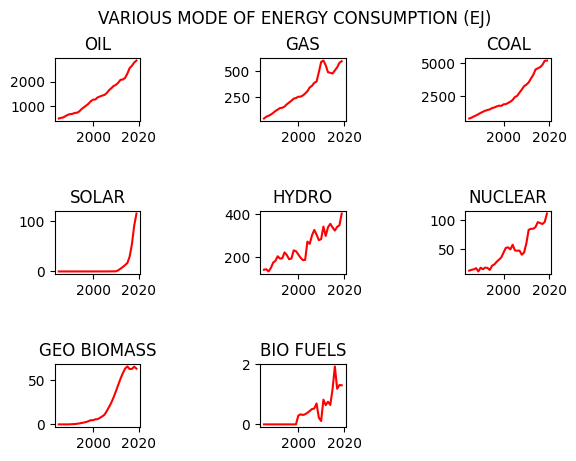

In [20]:
plt.suptitle('VARIOUS MODE OF ENERGY CONSUMPTION (EJ)',fontsize=12)

plt.subplot(5, 5, 1)
plt.title("OIL")
plt.plot(df['year'],df['oil_consumption_-_ej'],'-r')

plt.subplot(5, 5, 3)
plt.title("GAS")
plt.plot(df['year'],df['gas_consumption_-_ej'],'-r')

plt.subplot(5, 5, 5)
plt.title("COAL")
plt.plot(df['year'],df['coal_consumption_-_ej'],'-r')

plt.subplot(5, 5, 11)
plt.title("SOLAR")
plt.plot(df['year'],df['solar_consumption_-_ej'],'-r')

plt.subplot(5, 5, 13)
plt.title("HYDRO")
plt.plot(df['year'],df['hydro_consumption_-_ej'],'-r')

plt.subplot(5, 5, 15)
plt.title("NUCLEAR")
plt.plot(df['year'],df['nuclear_consumption_-_ej'],'-r')

plt.subplot(5, 5, 21)
plt.title("GEO BIOMASS")
plt.plot(df['year'],df['geo_biomass_other_-_ej'],'-r')

plt.subplot(5, 5, 23)
plt.title("BIO FUELS")
plt.plot(df['year'],df['biofuels_(twh)'],'-r')

plt.show()

Conclusion: Though oil,gas & coal consumption increased in India, but it can be seen that India have significantly increased the consumption of Green energy in the form of Solar, Geo Biomass.

## Analysing Annual CO2 Emission from 1985 to 2019

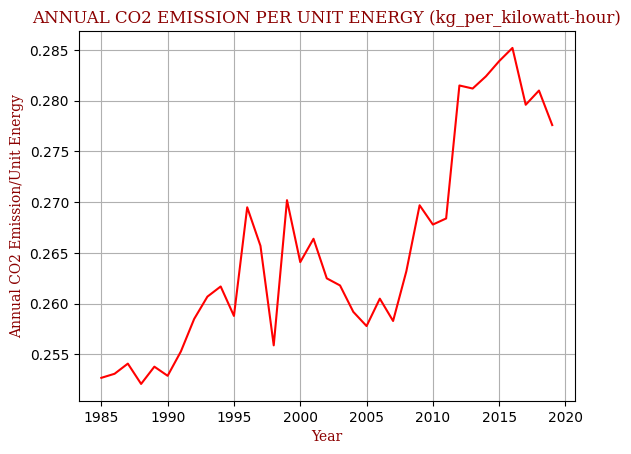

In [21]:
font1 = {'family':'serif','color':'darkred','size':12}
font2 = {'family':'serif','color':'darkred','size':10}

plt.title("ANNUAL CO2 EMISSION PER UNIT ENERGY (kg_per_kilowatt-hour)", fontdict = font1)
plt.xlabel("Year",fontdict = font2)
plt.ylabel("Annual CO2 Emission/Unit Energy",fontdict = font2)

plt.plot(df['year'],df['annual_co2_emissions_per_unit_energy_(kg_per_kilowatt-hour)'],'-r')

plt.grid()
plt.show()

Conclusion: It has beed observed that Annual CO2 emission have increased especially from 2006 to 2016

# ELECTRICITY GENERATION IN INDIA

## Analysing total electricity generation from 1985 to 2019

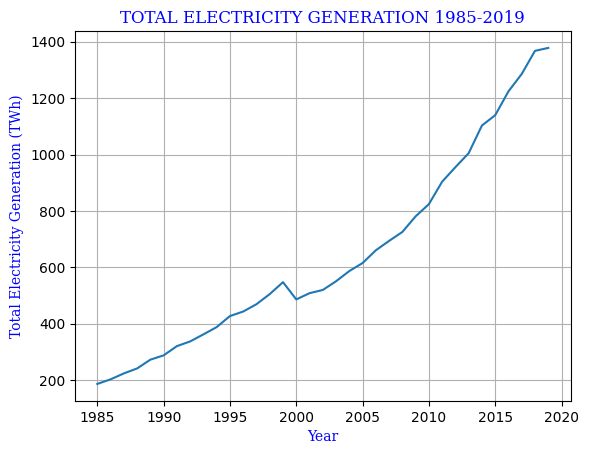

In [22]:
font1 = {'family':'serif','color':'blue','size':12}
font2 = {'family':'serif','color':'blue','size':10}

plt.title("TOTAL ELECTRICITY GENERATION 1985-2019", fontdict = font1)
plt.xlabel("Year",fontdict = font2)
plt.ylabel("Total Electricity Generation (TWh)",fontdict = font2)

plt.plot(df['year'],df['electricity_generation_(twh)'])

plt.grid()
plt.show()

Conclusion: It has beed observed that India have increased it electricity production by seven times from 1985 to 2019.

## Analysing diffrent methods to generate electricity from 1985 to 2019

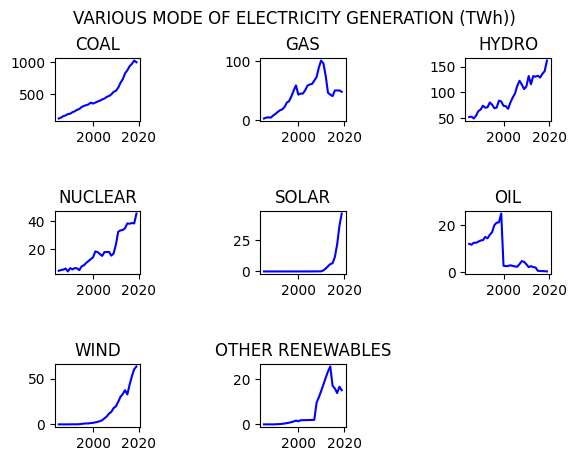

In [23]:
plt.suptitle('VARIOUS MODE OF ELECTRICITY GENERATION (TWh))',fontsize=12)

plt.subplot(5, 5, 1)
plt.title("COAL")
plt.plot(df['year'],df['electricity_from_coal_(twh)'],'-b')

plt.subplot(5, 5, 3)
plt.title("GAS")
plt.plot(df['year'],df['electricity_from_gas_(twh)'],'-b')

plt.subplot(5, 5, 5)
plt.title("HYDRO")
plt.plot(df['year'],df['electricity_from_hydro_(twh)'],'-b')

plt.subplot(5, 5, 11)
plt.title("NUCLEAR")
plt.plot(df['year'],df['electricity_from_nuclear_(twh)'],'-b')

plt.subplot(5, 5, 13)
plt.title("SOLAR")
plt.plot(df['year'],df['electricity_from_solar_(twh)'],'-b')

plt.subplot(5, 5, 15)
plt.title("OIL")
plt.plot(df['year'],df['electricity_from_oil_(twh)'],'-b')

plt.subplot(5, 5, 21)
plt.title("WIND")
plt.plot(df['year'],df['electricity_from_wind_(twh)'],'-b')

plt.subplot(5, 5, 23)
plt.title("OTHER RENEWABLES")
plt.plot(df['year'],df['electricity_from_other_renewables_(twh)'],'-b')

plt.show()

Conclusion: Coal is still the primary source of electricity for India but at the same time it can be observed that Renewable source of electricity have also started to contribute into total electricity in India. Also it is observed that now oil is no more a significant source of electricity in India.

## Analysing that what percentage of Indian Population have access to electricity from 1995 to 2019

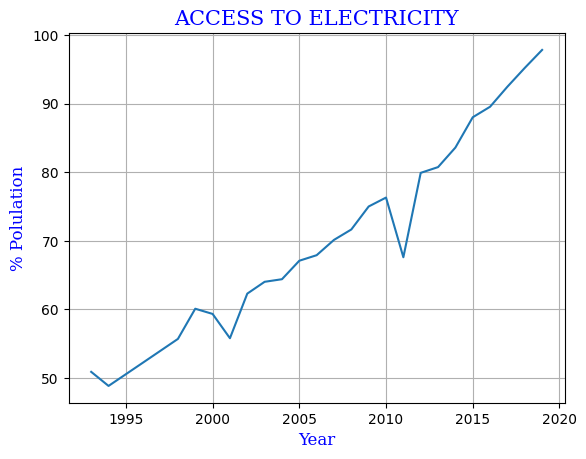

In [28]:
font1 = {'family':'serif','color':'blue','size':15}
font2 = {'family':'serif','color':'blue','size':12}

filtered_data = df[df['year'] >= 1993]

plt.title("ACCESS TO ELECTRICITY", fontdict = font1)
plt.xlabel("Year",fontdict = font2)
plt.ylabel("% Polulation",fontdict = font2)

plt.plot(filtered_data['year'], filtered_data['access_to_electricity_(%_of_population)'])

plt.grid()
plt.show()

Conclusion: It can be observed from above graph that more Indian Population is have access to electricity, though a significant dip was recorded after 2010 but it improved from 2012.

## Analysing that Clean electricity generation in India from 1985 to 2019

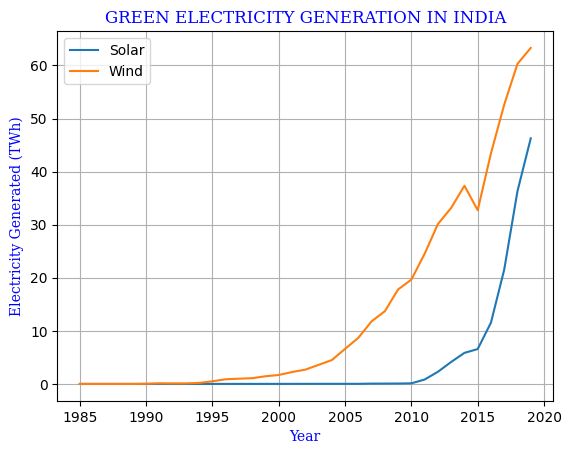

In [54]:
font1 = {'family':'serif','color':'blue','size':12}
font2 = {'family':'serif','color':'blue','size':10}

plt.title("GREEN ELECTRICITY GENERATION IN INDIA", fontdict = font1)
plt.xlabel("Year",fontdict = font2)
plt.ylabel("Electricity Generated (TWh)",fontdict = font2)

plt.plot(df['year'],df['electricity_from_solar_(twh)'])
plt.plot(df['year'],df['electricity_from_wind_(twh)'])

plt.legend(['Solar','Wind'])

plt.grid()
plt.show()

Conclusion: A good spike in Solar and Wind energy from 2010 is visible from above graph, which can be considered a positive sigh as it show that India is shifting towards a greener future.